In [35]:
import matplotlib.pyplot as plt
import numpy as np
import random
import mediapipe as mp
import pickle
import cv2
import os

In [36]:
data, labels = [], []
dir = 'images/'

In [37]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [38]:
def create_data(data_dir, verbose=1):
    for dir_ in os.listdir(data_dir):
        for img_path in os.listdir(os.path.join(data_dir, dir_)):
            data_aux = []

            x_ = []
            y_ = []

            img = cv2.imread(os.path.join(data_dir, dir_, img_path))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y

                        x_.append(x)
                        y_.append(y)

                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        data_aux.append(x - min(x_))
                        data_aux.append(y - min(y_))

                data.append(data_aux)
                labels.append(dir_)

In [39]:
create_data(data_dir=dir)

In [34]:
with open('data.pkl', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)

In [ ]:
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

In [35]:
random.shuffle(training_data)

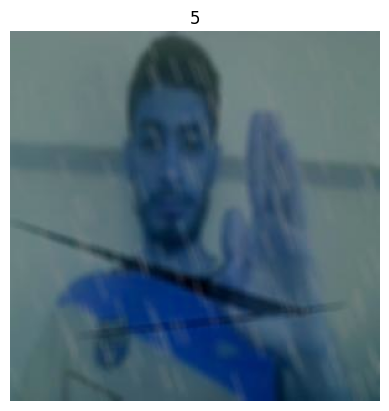

In [36]:
plt.imshow(training_data[3][0])
plt.axis('off')
plt.title(training_data[3][1])
plt.show()

In [37]:
X, y = [], []

for im, label in training_data:
    X.append(im)
    y.append(label)

In [38]:
X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)
y = np.array(y)
X = X / 255.0

In [ ]:
""" hdf5_file = "training_data.h5"

with h5py.File(hdf5_file, "w") as f:
    f.create_dataset("X", data=X)
    f.create_dataset("y", data=y) """

In [39]:
with open('utils/images_array.pkl', 'wb') as file:
    pickle.dump(X, file)

In [40]:
with open('utils/features_array.pkl', 'wb') as file:
    pickle.dump(y, file)

In [41]:
del X
del y
del training_data
import gc
gc.collect()

2463